In [1]:
notebook_fiducia = "FONDO DE INVERSION COLECTIVA ABIERTO RENTA ALTA CONVICCION"
notebook_filename = "../data/valores-bancolombia-fic_2020-11-29.csv"
notebook_serie_name = "Núm. Invers."

In [ ]:
notebook_execution_date = "2020-11-29"
notebook_output_suffix = "2nd_variation__"

In [2]:
import numpy as np
import pandas as pd

In [3]:
from financial_ml.core import *
from features.buy_daily_during_bullish import *

In [ ]:
import os
import dotenv
dotenv.load_dotenv()
repo = os.environ.get('REPO')

In [ ]:
date_suffix = notebook_execution_date

notebook_filename = repo + "/data/" + notebook_filename
print(notebook_filename)

# EDA ANALISIS

In [5]:
investors_builder = CSV2TimeSerie(notebook_filename, notebook_serie_name)

In [6]:
timeserie = investors_builder.build(notebook_fiducia)
timeserie.to_df().head()

,ds,y
0,2016-06-20,10
1,2016-06-21,13
2,2016-06-22,15
3,2016-06-23,22
4,2016-06-24,26


## Timeserie exploration

The input CSV file has 3 relevan columns, this notebook explores the statistical properties of one of the columns

In [7]:
MSG = """
The timeserie for {name} has {size} point with a this 1d period.
"""

print(MSG.format(
    name=notebook_serie_name,
    size=timeserie.to_df().shape[0]
))


The timeserie for Núm. Invers. has 1621 point with a this 1d period.



### This is a report of the timeserie

it starts by plotting the serie as a function of time, then it proceds to use boxplots to visualize the statistical properties by unit of time.

Finally it models the points in the serie as independet samples and checks the statistical properties, it differentiates the serie to check if there is an improvement.

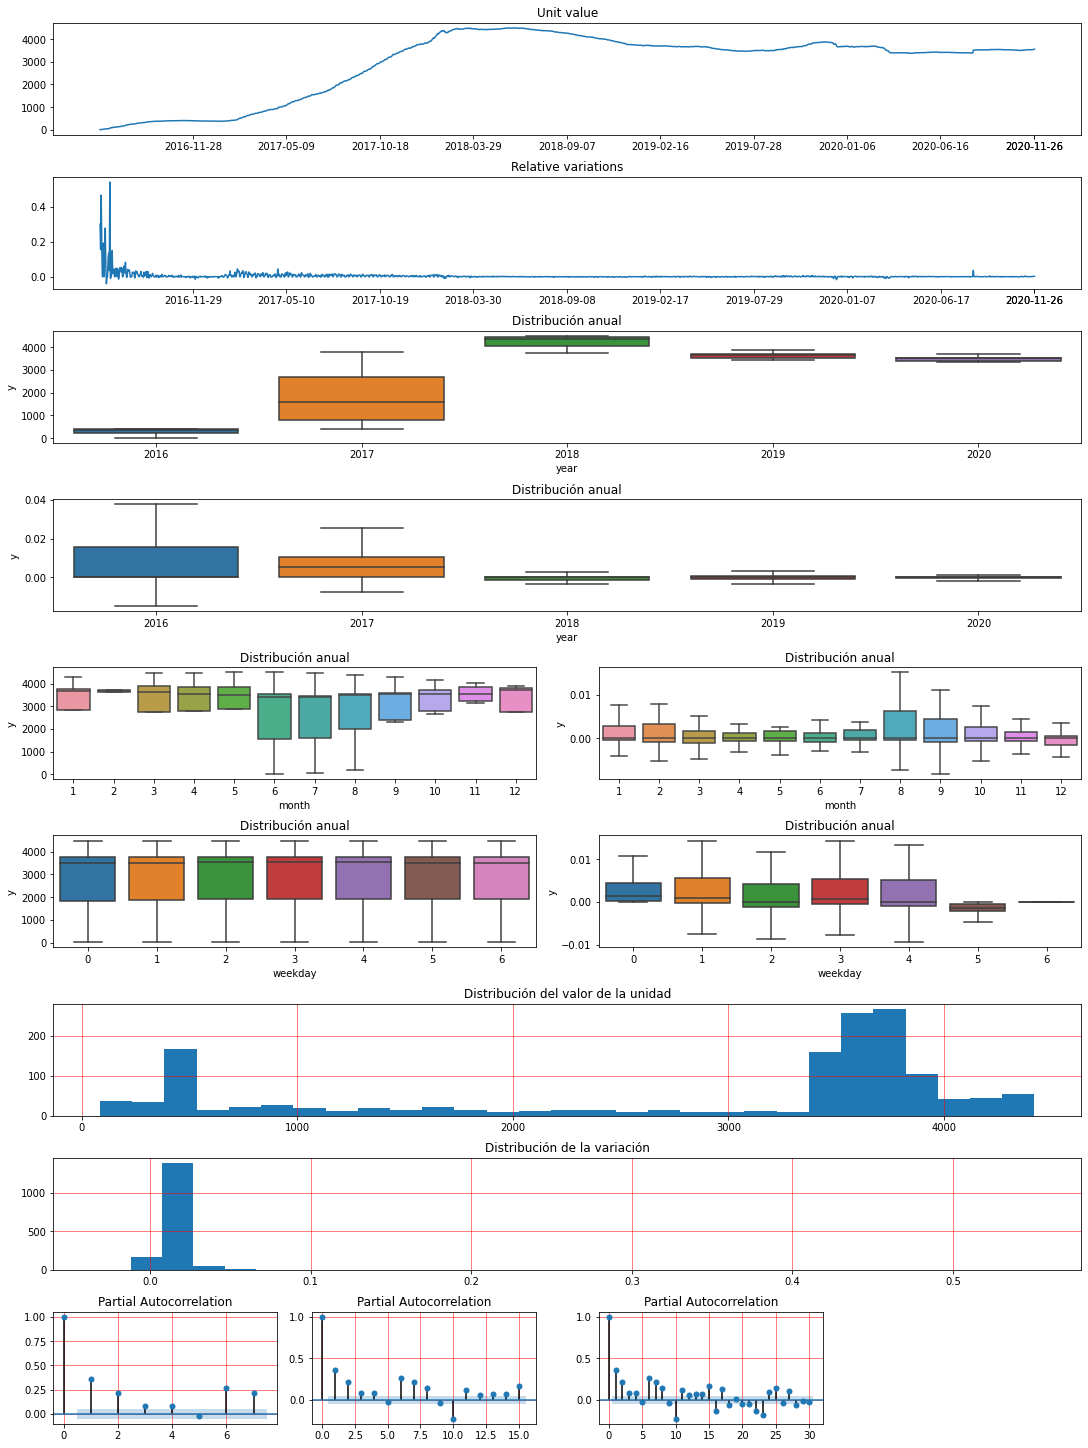

In [8]:
PyplotTimeSerie().plot(timeserie)

### Differentiated report

The idea is that the points are not corretaled to each other, this is done to sample morre easily. If there is too much correlation you might try differentiating the time serie.

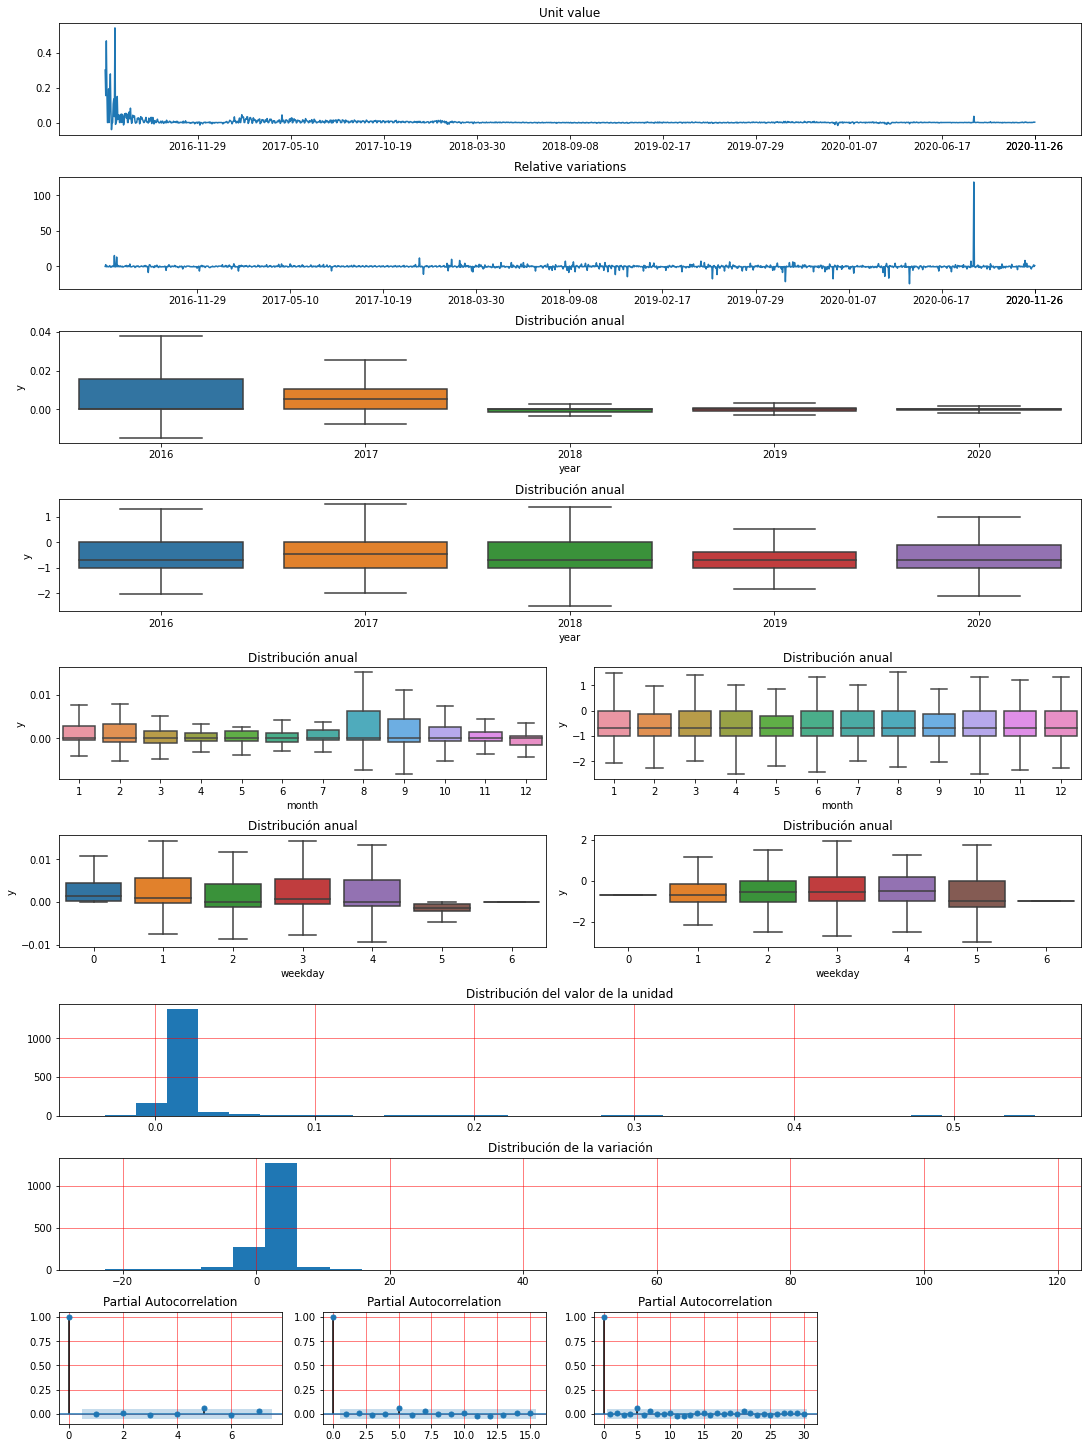

In [9]:
differentiated = Differentitator().transform(timeserie)
PyplotTimeSerie().plot(differentiated)

### 2nd differentiation

The points after the differentitating are still correlated.

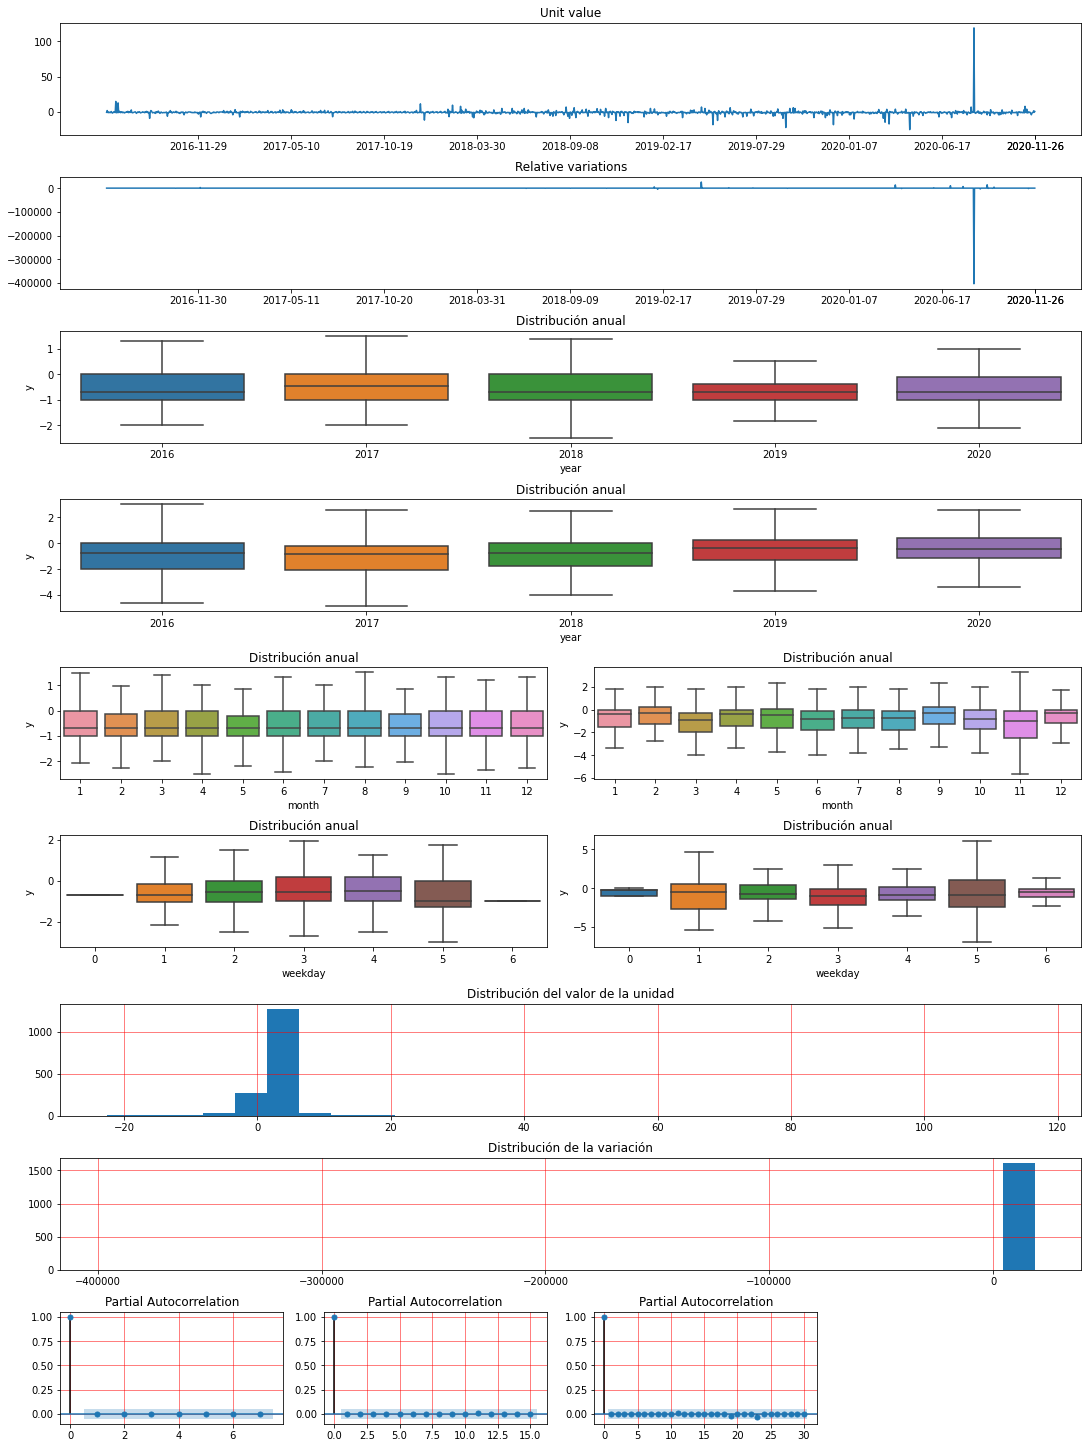

In [10]:
variations_differences = Differentitator().transform(differentiated)
PyplotTimeSerie().plot(variations_differences)

## Features exploration:

I need to build the features for the estimator using the timeserie as input.

In [11]:
extractors = [
    WeeklyExtractor('last_week_sum', sum),
    WeeklyExtractor('last_week_mean', np.mean),
    WeeklyExtractor('last_week_std', np.std),
    MonthlyExtractor('last_month_sum', sum),
    MonthlyExtractor('last_month_mean', np.mean),
    MonthlyExtractor('last_month_std', np.std),
    YearlyExtractor('last_year_sum', sum),
    YearlyExtractor('last_year_mean', np.mean),
    YearlyExtractor('last_year_std', np.std)   
]

features = EDAFeaturesImpl(
    extractors,
    notebook_fiducia,
    notebook_serie_name,
    date_suffix,
    notebook_output_suffix
)

In [12]:
features_builder = FeaturesBuilder(features)
features_builder.extract(variations_differences)

The sum and mean aggregations produce similar histograms, it seems to me tha they convey similar information

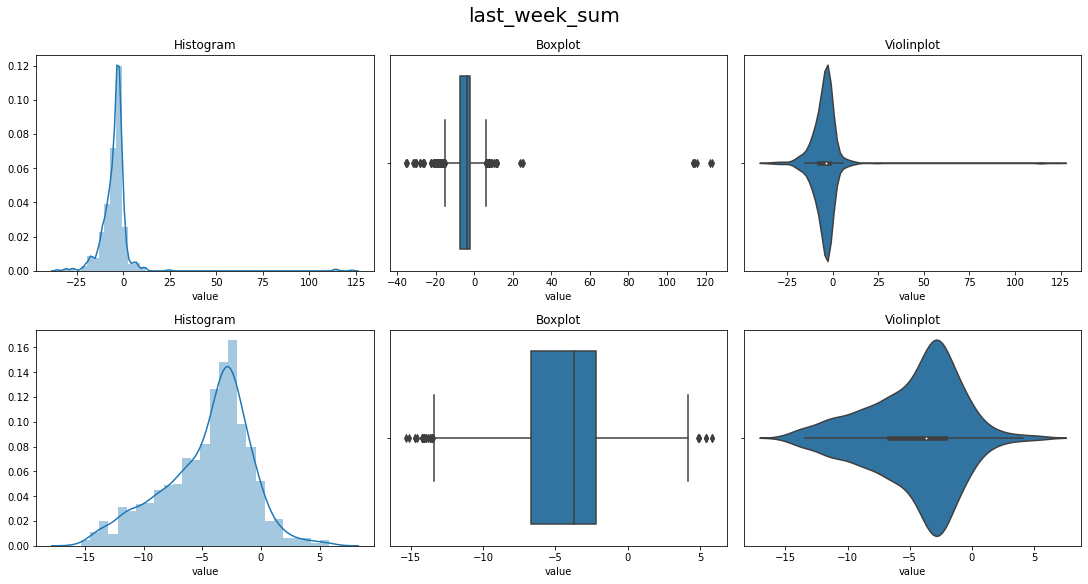

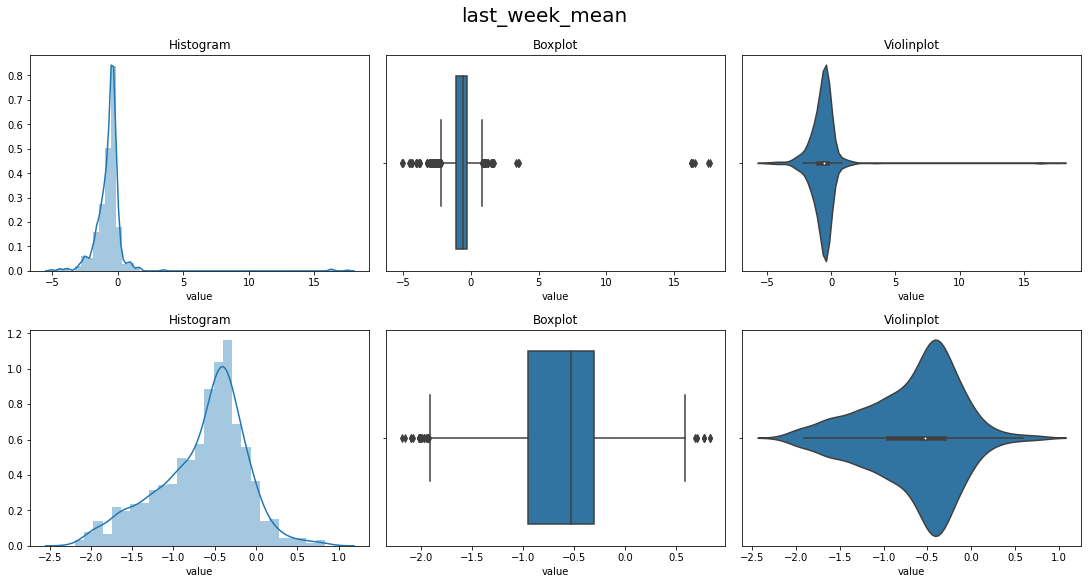

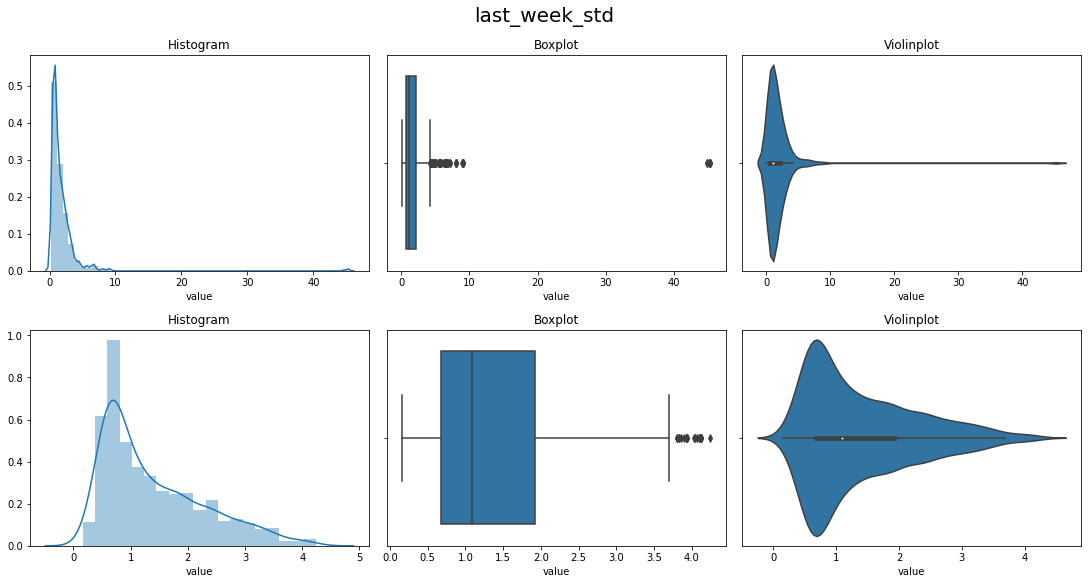

In [13]:
PyplotFeatures().plot(features)

In [14]:
features.write(drop=['last_week_mean'])

../data/2020-11-29/FONDO_DE_INVERSION_COLECTIVA_ABIERTO_RENTA_ALTA_CONVICCION/features/2nd_variation____Num_Invers.parquet


## Label exploration:

I need to do this exercise twice, i need a label for the regressor and other for the classifier.

### Regressor

I am intereseted in predicting the unit value but it could also be useful to predict the variations. I could also try using the serie after second differentiation, in this case i think that i could use it as the slope of the last observed variation.

### Classifier

Right now i am only interested in telling if the market is bullish.

In [15]:
acceleration_builder = TimeSerie2Variable(continuous=True)
acceleration = acceleration_builder.build(variations_differences)

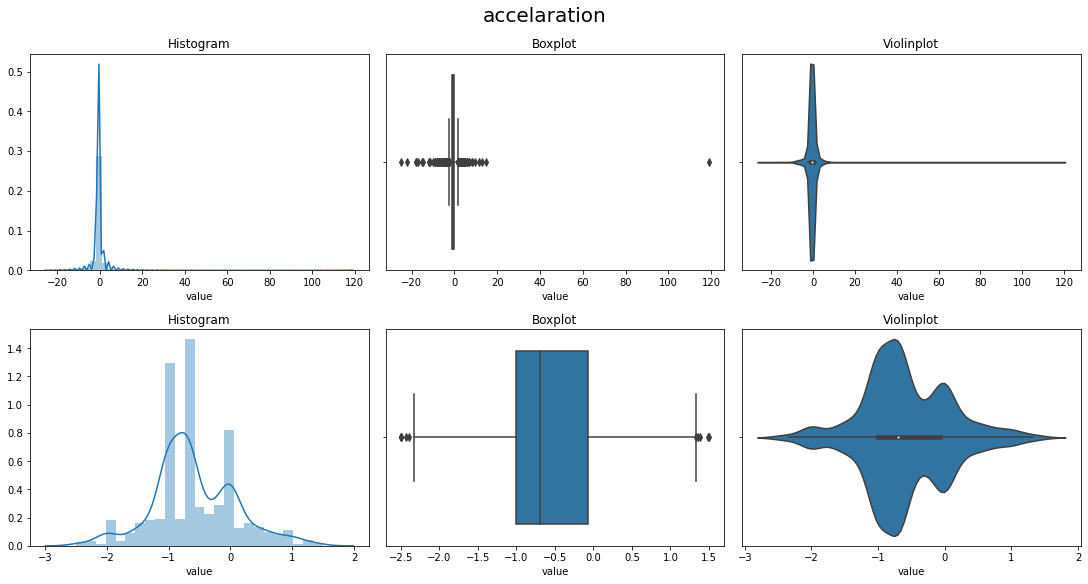

In [16]:
PyplotContinuous('accelaration').plot(acceleration)

In [17]:
label = LabelImp(
    acceleration,
    notebook_fiducia,
    notebook_serie_name,
    date_suffix,
    notebook_output_suffix
)

In [18]:
label.write(drop=[])

../data/2020-11-29/FONDO_DE_INVERSION_COLECTIVA_ABIERTO_RENTA_ALTA_CONVICCION/labels/2nd_variation____Num_Invers.parquet
